# A super-simple Gibbs sampler
### this one's done with a python dictionary 
We're going to try out Gibbs sampling on the hypercube. The simplest possible case surely?

ie. there are $N$ variables, and they're all binary, so there are $2^N$ states, which are the vertices of a hypercube in $N$ dimensions.

We'll specify some probability $P(\mathbf{x})$ for each pattern (= binary string) $\mathbf{x}$.

Then we'll run heaps of Gibbs Sampler updates from some initial state, and count how often the sampler visits each state.

If we're right, these counts should come to match our target distribution: bingo!

In [1]:
%reset -f
%matplotlib inline
import matplotlib as mpl
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2, suppress = True)
import time
rng.seed(int(time.time())) # seed the random number generator

## set the patterns up, and give them target probabilities

Make up an array with each row being one of the binary patterns. Do 'em all. Give each one some "target probability".


In [2]:
# make up an array with each row being one of the binary patterns. Do 'em all. Give each one some "target probability".

N = 3  # dimensionality of the input patterns
targProb = {}  # these are going to be dictionaries.
testVal = 1.0
inpats = []
for p in [[0 if (i & (1 << bit) == 0) else 1 for bit in range(N)] for i in range(2**N)]:
    inpats.append(p)
    targProb[tuple(p)] = testVal
    testVal *= 2

for p in inpats:
    print ("%s  target probability is %.3f" % (p, targProb[tuple(p)]))

[0, 0, 0]  target probability is 1.000
[1, 0, 0]  target probability is 2.000
[0, 1, 0]  target probability is 4.000
[1, 1, 0]  target probability is 8.000
[0, 0, 1]  target probability is 16.000
[1, 0, 1]  target probability is 32.000
[0, 1, 1]  target probability is 64.000
[1, 1, 1]  target probability is 128.000


So here I've made the probabilities really varied - some big, some small - to see whether Gibbs sampler can capture that range successfully.

Notice that "targProb" is NOT normalised. Gibbs works just fine even if it isn't - it just needs to be positive.

## Gibbs Sampler!

In [3]:
ITERATIONS = 1000 * 2 ** N
count = {}
for p in inpats:
    count[tuple(p)] = 0

x = np.zeros(N) # just to start it off
for _ in range(ITERATIONS):
    index = rng.randint(N)  # choose one dimension, whose value we will reset
    x[index] = 1
    logProb_with_1 = np.log(targProb[tuple(x)])
    x[index] = 0
    logProb_with_0 = np.log(targProb[tuple(x)])
    
    r = sigmoid(logProb_with_1 - logProb_with_0)
    if rng.rand() < r:
        x[index] = 1 # no need for 'else' since it's zero at this point anyway
    count[tuple(x)] += 1

empirical = np.array([count[tuple(k)] for k in inpats])
theoretical = np.array([targProb[tuple(k)] for k in inpats])

## Compare samples made by Gibbs with the target distribution

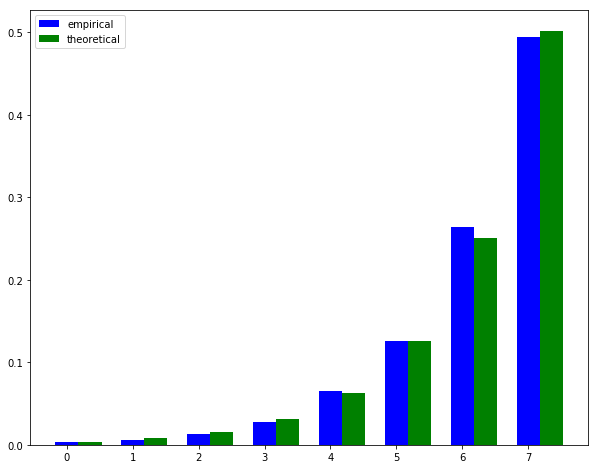

In [4]:
ids = a(range(2**N))
empi = empirical / (np.sum(empirical))
theo = theoretical / (np.sum(theoretical))
width = 0.35
plt.figure(figsize=(10,8))
plt.bar(ids, empi, width, color='b', label='empirical')
plt.bar(ids+width, theo, width, color='g', label='theoretical')
plt.legend()

pass